# Data Analysis on Covid-19 Geospatial Dataset with Python

Let's import the necessary libraries for this project.

In [1]:
from datetime import datetime
import pandas as pd # for reading the data
import numpy as np # for data manipulation
import geopandas as gpd # for dealing with geospatial data
import contextily as ctx # gives us the abilty to have a basemap for the geopandas plot
import matplotlib.pyplot as plt # for data visualization

## Reading Data

Now, let's proceed to reading the data. 
Our data can be found in https://data.humdata.org/.
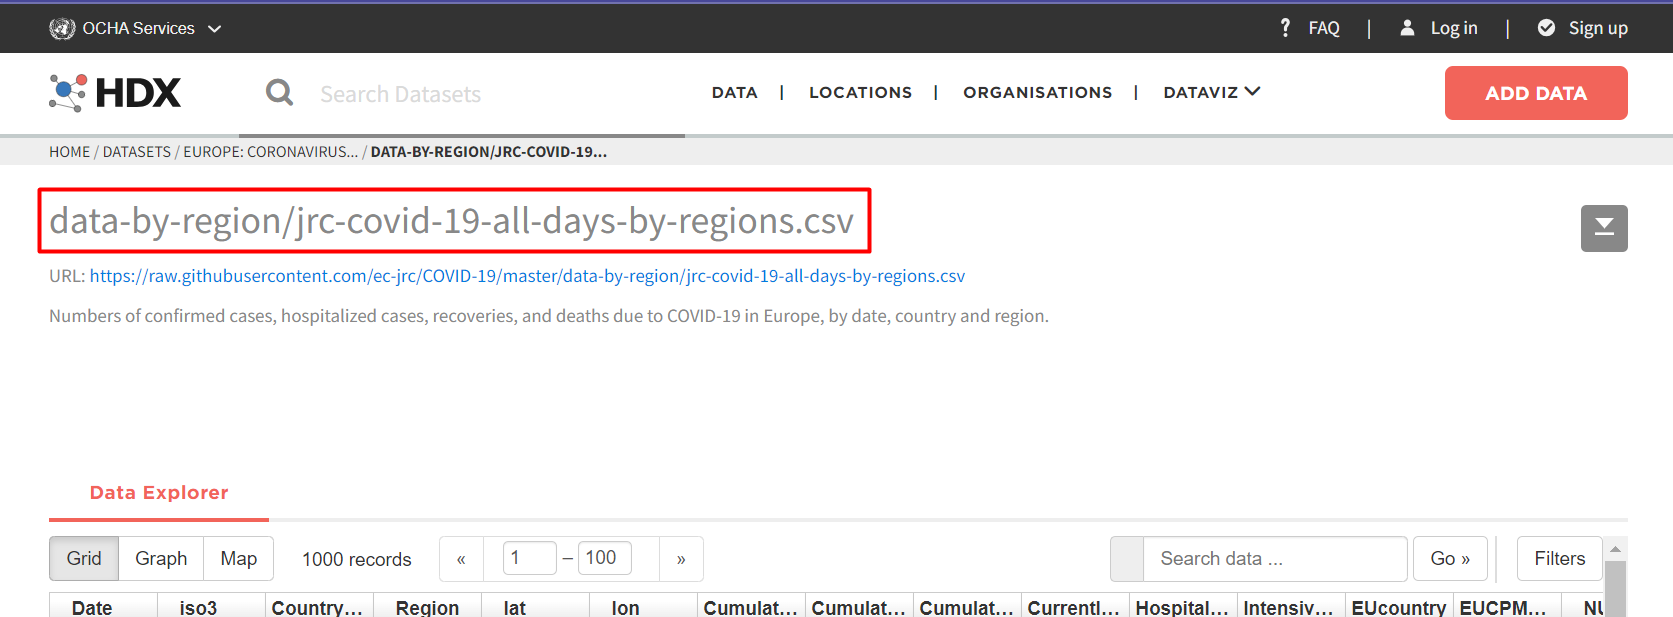

We can access the data using the URL below, and Pandas allows us to directly read data from a URL. 

In [2]:
raw_url = "https://raw.githubusercontent.com/ec-jrc/COVID-19/master/data-by-region/jrc-covid-19-all-days-by-regions.csv"
raw_data = pd.read_csv(raw_url)
df = raw_data.copy()
df.head() #check the first 5 rows in the dataset

,Date,iso3,CountryName,Region,lat,lon,CumulativePositive,CumulativeDeceased,CumulativeRecovered,CurrentlyPositive,Hospitalized,IntensiveCare,EUcountry,EUCPMcountry,NUTS
0,2020-01-03,AIA,Anguilla,NaN,18.225120,-63.072130,0.0,0.0,NaN,0,NaN,NaN,False,False,AI
1,2020-01-03,DMA,Dominica,NaN,15.416749,-61.364130,0.0,0.0,NaN,0,NaN,NaN,False,False,DM
2,2020-01-03,DOM,Dominican Republic,NaN,18.736509,-70.161744,0.0,0.0,NaN,0,NaN,NaN,False,False,DO
3,2020-01-03,FLK,Falkland Islands (Malvinas),NaN,-51.800581,-59.528839,0.0,0.0,NaN,0,NaN,NaN,False,False,FK
4,2020-01-03,IDN,Indonesia,NaN,-2.518722,118.015568,0.0,0.0,NaN,0,NaN,NaN,False,False,ID


In [3]:
# check the data types of all columns
df.dtypes

Date                    object
iso3                    object
CountryName             object
Region                  object
lat                    float64
lon                    float64
CumulativePositive     float64
CumulativeDeceased     float64
CumulativeRecovered    float64
CurrentlyPositive        int64
Hospitalized           float64
IntensiveCare          float64
EUcountry                 bool
EUCPMcountry              bool
NUTS                    object
dtype: object

In [4]:
# If the datatypes are not proper, we may use the following format

#dtypes = {  # bool will return value error because we hav NaN values
#    'Date': object,
#    'iso3': object,
#    'CountryName': object,
#    'Region': object,
#    'lat': float,
#    'lon': float,
#    'CumulativePositive': float,
#    'CumulativeDeceased': float,
#    'CumulativeRecovered': float,
#    'CurrentlyPositive': float,
#    'Hospitalized': float,
#    'IntensiveCare': float,
#    'EUcountry': np.bool,
#    'EUCPMcountry': np.bool,
#    'NUTS': object,
#    }

#df = pd.read_csv(url, skiprows=range(1, 2), dtype=dtypes)
#df.head()

In [5]:
df.tail() #check the last 5 rows in the dataset

,Date,iso3,CountryName,Region,lat,lon,CumulativePositive,CumulativeDeceased,CumulativeRecovered,CurrentlyPositive,Hospitalized,IntensiveCare,EUcountry,EUCPMcountry,NUTS
311124,2023-05-03,CHE,Switzerland,Uri,46.775402,8.627444,15432.0,68.0,0.0,15364,8.0,0.0,False,False,CH062
311125,2023-05-03,CHE,Switzerland,Valais,46.211633,7.611267,150970.0,820.0,0.0,150150,16.0,2.0,False,False,CH012
311126,2023-05-03,CHE,Switzerland,Vaud,46.561760,6.648929,335338.0,1018.0,0.0,334320,414.0,42.0,False,False,CH011
311127,2023-05-03,CHE,Switzerland,Zug,47.161402,8.538864,60668.0,172.0,11004.0,49492,35.0,6.0,False,False,CH066
311128,2023-05-03,CHE,Switzerland,Zurich,47.417407,8.655988,803198.0,1890.0,0.0,801308,56.0,4.0,False,False,CH040


In [6]:
df.shape

(311129, 15)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311129 entries, 0 to 311128
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Date                 311129 non-null  object 
 1   iso3                 311129 non-null  object 
 2   CountryName          311129 non-null  object 
 3   Region               154045 non-null  object 
 4   lat                  290896 non-null  float64
 5   lon                  290896 non-null  float64
 6   CumulativePositive   307729 non-null  float64
 7   CumulativeDeceased   276407 non-null  float64
 8   CumulativeRecovered  100310 non-null  float64
 9   CurrentlyPositive    311129 non-null  int64  
 10  Hospitalized         88784 non-null   float64
 11  IntensiveCare        87864 non-null   float64
 12  EUcountry            311129 non-null  bool   
 13  EUCPMcountry         311129 non-null  bool   
 14  NUTS                 297240 non-null  object 
dtypes: bool(2), float

This provides the total number of rows, non-null counts for each column, and the data types. It's worth noting that some coordinates are missing in the dataset.

In [8]:
df.describe()

,lat,lon,CumulativePositive,CumulativeDeceased,CumulativeRecovered,CurrentlyPositive,Hospitalized,IntensiveCare
count,290896.000000,290896.000000,3.077290e+05,2.764070e+05,1.003100e+05,3.111290e+05,88784.000000,87864.000000
mean,33.430452,9.557539,6.359538e+05,1.078694e+04,2.584895e+05,5.360823e+05,920.324935,121.139227
std,22.905426,45.925015,3.827320e+06,5.600186e+04,2.032610e+06,3.927674e+06,4402.586581,579.116441
min,-51.800581,-143.903496,-6.900000e+01,0.000000e+00,0.000000e+00,-3.820020e+07,0.000000,0.000000
25%,17.363183,-2.333125,3.190000e+03,5.900000e+01,0.000000e+00,1.217000e+03,5.000000,0.000000
50%,42.176820,9.896366,2.794800e+04,4.730000e+02,9.990000e+02,1.502400e+04,37.000000,4.000000
75%,48.193764,20.090775,2.072210e+05,3.447000e+03,3.066400e+04,1.429290e+05,253.000000,30.000000
max,71.702379,178.416339,1.030815e+08,1.121819e+06,3.820020e+07,1.019596e+08,94136.000000,10098.000000


In [9]:
# Let's see the Earliest and Latest date in our dataset
df.Date.max(), df.Date.min()

('2023-05-03', '2020-01-03')

In [10]:
# Let's check the Covid-19 data for Philippines
ph_df = df[df['CountryName'] == 'Philippines']
ph_df.tail()

,Date,iso3,CountryName,Region,lat,lon,CumulativePositive,CumulativeDeceased,CumulativeRecovered,CurrentlyPositive,Hospitalized,IntensiveCare,EUcountry,EUCPMcountry,NUTS
309199,2023-04-05,PHL,Philippines,NaN,12.881958,121.766541,4081818.0,66390.0,NaN,4015428,NaN,NaN,False,False,PH
309398,2023-04-06,PHL,Philippines,NaN,12.881958,121.766541,4081818.0,66390.0,NaN,4015428,NaN,NaN,False,False,PH
309800,2023-04-12,PHL,Philippines,NaN,12.881958,121.766541,4083678.0,66420.0,NaN,4017258,NaN,NaN,False,False,PH
310286,2023-04-19,PHL,Philippines,NaN,12.881958,121.766541,4085969.0,66439.0,NaN,4019530,NaN,NaN,False,False,PH
310773,2023-04-26,PHL,Philippines,NaN,12.881958,121.766541,4087964.0,66444.0,NaN,4021520,NaN,NaN,False,False,PH


In [11]:
ph_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 896 entries, 373 to 310773
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 896 non-null    object 
 1   iso3                 896 non-null    object 
 2   CountryName          896 non-null    object 
 3   Region               0 non-null      object 
 4   lat                  896 non-null    float64
 5   lon                  896 non-null    float64
 6   CumulativePositive   896 non-null    float64
 7   CumulativeDeceased   896 non-null    float64
 8   CumulativeRecovered  0 non-null      float64
 9   CurrentlyPositive    896 non-null    int64  
 10  Hospitalized         0 non-null      float64
 11  IntensiveCare        0 non-null      float64
 12  EUcountry            896 non-null    bool   
 13  EUCPMcountry         896 non-null    bool   
 14  NUTS                 896 non-null    object 
dtypes: bool(2), float64(7), int64(1), o

In [12]:
ph_df.shape

(896, 15)

In [13]:
# Let's see the latest and earliest date in our PH dataset
ph_df.Date.max(), ph_df.Date.min()

('2023-04-26', '2020-01-31')

We have successfully read the data using Pandas and explored some of its characteristics. Next, we will convert the Pandas DataFrame into a Geodataframe, enabling us to query the data by location.

## Geodataframe

We have already imported Geopandas as gpd. But before we can convert the data into a Geodataframe, we need to take care of a few things. Specifically, we had some missing coordinates in the latitude and longitude columns. Therefore, we need to drop those rows before creating the Geodataframe. Otherwise, Geopandas will throw an error, which makes sense because we need the coordinates for our geospatial data.

To drop the rows with missing coordinates, we'll use the `dropna` function on the dataframe. We'll set the `axis` parameter to zero since we want to drop rows, and we'll specify the subset to be the "__lat__" and "__long__" columns. We don't need to create a copy of the dataframe; we'll perform the entire processing without doing so. We'll set `inplace` to be true to apply the changes directly to the dataframe. Let me run this code to complete the process.

In [14]:
df.dropna(axis=0, subset=["lat", "lon"], inplace = True)

In [15]:
#Let us check the dataframe again:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290896 entries, 0 to 311128
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Date                 290896 non-null  object 
 1   iso3                 290896 non-null  object 
 2   CountryName          290896 non-null  object 
 3   Region               144775 non-null  object 
 4   lat                  290896 non-null  float64
 5   lon                  290896 non-null  float64
 6   CumulativePositive   290797 non-null  float64
 7   CumulativeDeceased   259202 non-null  float64
 8   CumulativeRecovered  95330 non-null   float64
 9   CurrentlyPositive    290896 non-null  int64  
 10  Hospitalized         85127 non-null   float64
 11  IntensiveCare        83815 non-null   float64
 12  EUcountry            290896 non-null  bool   
 13  EUCPMcountry         290896 non-null  bool   
 14  NUTS                 289731 non-null  object 
dtypes: bool(2), float

When we call `df.dropna(axis=0, subset=["lat", "lon"], inplace=True)`, it drops the rows that have any null values in the specified subset of columns ("lat" and "lon" in this case). However, if there were no null values in those columns to begin with, the method won't remove any rows, and the DataFrame remains unchanged.

The initial `df.info()` output shows that both "__lat__" and "__lon__" columns had non-null counts of 290,896 before applying `dropna()`. After applying `dropna()`, the non-null count remains the same, indicating that there were no null values in those columns.

Now that we have dropped the rows with missing coordinates, there is another thing we need to specify before creating the Geodataframe. We need to define the _coordinate reference system_ (__CRS__) of the data we want to convert. The __CRS__ sets a particular projection or transformation to flatten the Earth. For our data, we'll use the _WGS84_ CRS, which is commonly used for data that utilizes decimal degrees in latitude and longitude. The code for the _WGS84_ CRS is _EPSG:4326_. You can find coordinate systems for the world on the https://epsg.io/ website.

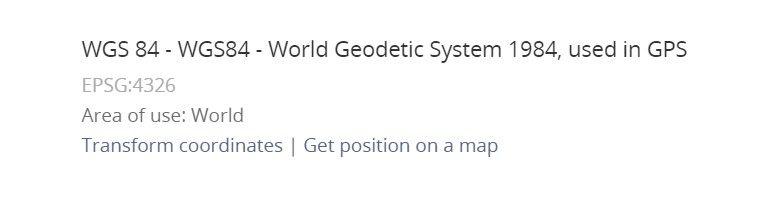

Let's create a variable called CRS and assign it the value of the EPSG code for WGS84 (EPSG:4326).

In [16]:
crs = "EPSG:4326"

 Now, we can create the Geodataframe. We'll call it `gdf` and use the `geodataframe` function from Geopandas.

In [17]:
gdf = gpd.GeoDataFrame(df, crs=crs, geometry=gpd.points_from_xy(df.lon, df.lat))

Let's break down the code and understand its functionality:

>`gpd`: It represents the GeoPandas library, which extends the capabilities of pandas to work with geospatial data.

>`GeoDataFrame()`: It is a class provided by GeoPandas that creates a GeoDataFrame object. A GeoDataFrame is a pandas DataFrame with additional functionalities for working with geospatial data.

>`df`: It is the original DataFrame that contains the data.

>`crs`: It represents the coordinate reference system (CRS) of the geometries in the GeoDataFrame. CRS defines how the geometric data should be interpreted and placed on the Earth's surface.

>`geometry`: It specifies the column name or array-like object that contains the geometric information for each row. In this case, the `geometry` parameter is set to `gpd.points_from_xy(df.lon, df.lat)`, which creates a GeoSeries of Point geometries from the "lon" (longitude) and "lat" (latitude) columns of the original DataFrame.

>The `gpd.points_from_xy()` function takes the longitude and latitude values as input and returns a GeoSeries of Point geometries. Each Point geometry represents a specific location on the Earth's surface.

>`gdf`: It is the resulting GeoDataFrame that is created by passing the original DataFrame, __crs__, and geometry information to the `GeoDataFrame()` constructor.

By creating the GeoDataFrame, the code enables the manipulation and analysis of geospatial data. The GeoDataFrame contains all the columns from the original DataFrame (df), along with an additional geometry column that holds the Point geometries representing the spatial information (longitude and latitude) for each row.

Let's check the head of the __gdf__ using `gdf.head()`.

In [18]:
gdf.head()

,Date,iso3,CountryName,Region,lat,lon,CumulativePositive,CumulativeDeceased,CumulativeRecovered,CurrentlyPositive,Hospitalized,IntensiveCare,EUcountry,EUCPMcountry,NUTS,geometry
0,2020-01-03,AIA,Anguilla,NaN,18.225120,-63.072130,0.0,0.0,NaN,0,NaN,NaN,False,False,AI,POINT (-63.07213 18.22512)
1,2020-01-03,DMA,Dominica,NaN,15.416749,-61.364130,0.0,0.0,NaN,0,NaN,NaN,False,False,DM,POINT (-61.36413 15.41675)
2,2020-01-03,DOM,Dominican Republic,NaN,18.736509,-70.161744,0.0,0.0,NaN,0,NaN,NaN,False,False,DO,POINT (-70.16174 18.73651)
3,2020-01-03,FLK,Falkland Islands (Malvinas),NaN,-51.800581,-59.528839,0.0,0.0,NaN,0,NaN,NaN,False,False,FK,POINT (-59.52884 -51.80058)
4,2020-01-03,IDN,Indonesia,NaN,-2.518722,118.015568,0.0,0.0,NaN,0,NaN,NaN,False,False,ID,POINT (118.01557 -2.51872)


As we can see, there isn't much difference compared to the previous dataframe. However, there is one major difference: we have a new column called "__geometry__." This column contains the point geometry of the latitude and longitude. This small change of having a geometry column opens up a whole new functionality of querying and performing geoprocessing with Geopandas.

To test this functionality, we can call `gdf.plot()` and run this simple line of code to get a map of these points.

<AxesSubplot:>

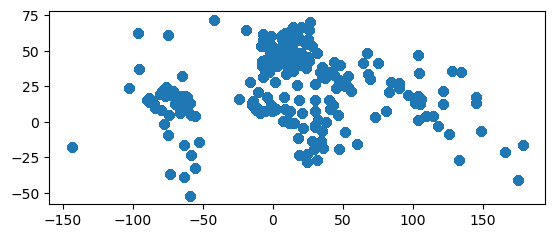

In [19]:
gdf.plot()

We will notice the X and Y axes and the plotted points. If the image appears small, we can make it larger by passing the `figsize` parameter.

<AxesSubplot:>

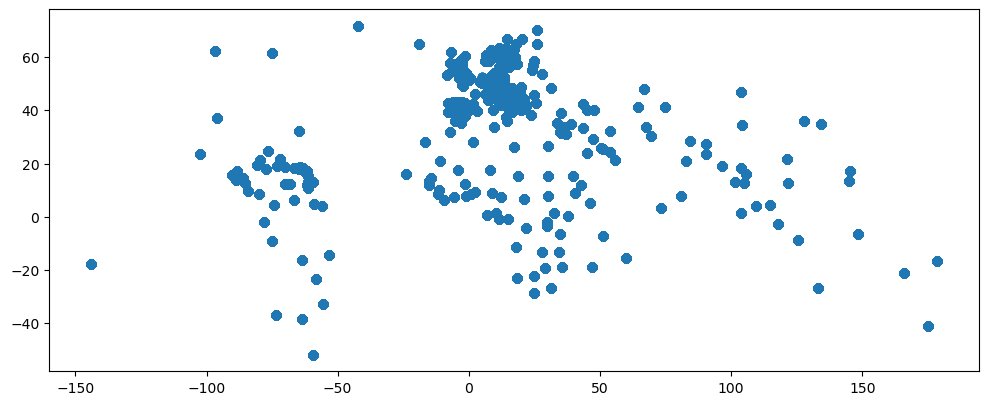

In [20]:
# Here, we can specify the width and height, such as 12 by 10.
gdf.plot(figsize=(12,10))

Now the image is bigger and better. However, this plot is not particularly useful or interesting. To address this, we can enhance the plot by incorporating maps and utilizing base maps for better visualization.

## Plotting Maps 

After converting our DataFrame to a GeoDataFrame, we will now create beautiful maps using Geopandas. So far, we have only plotted the points, but we can design a better map by using the parameters provided in Geopandas and Matplotlib.
To add context to our map, we will incorporate a base map.

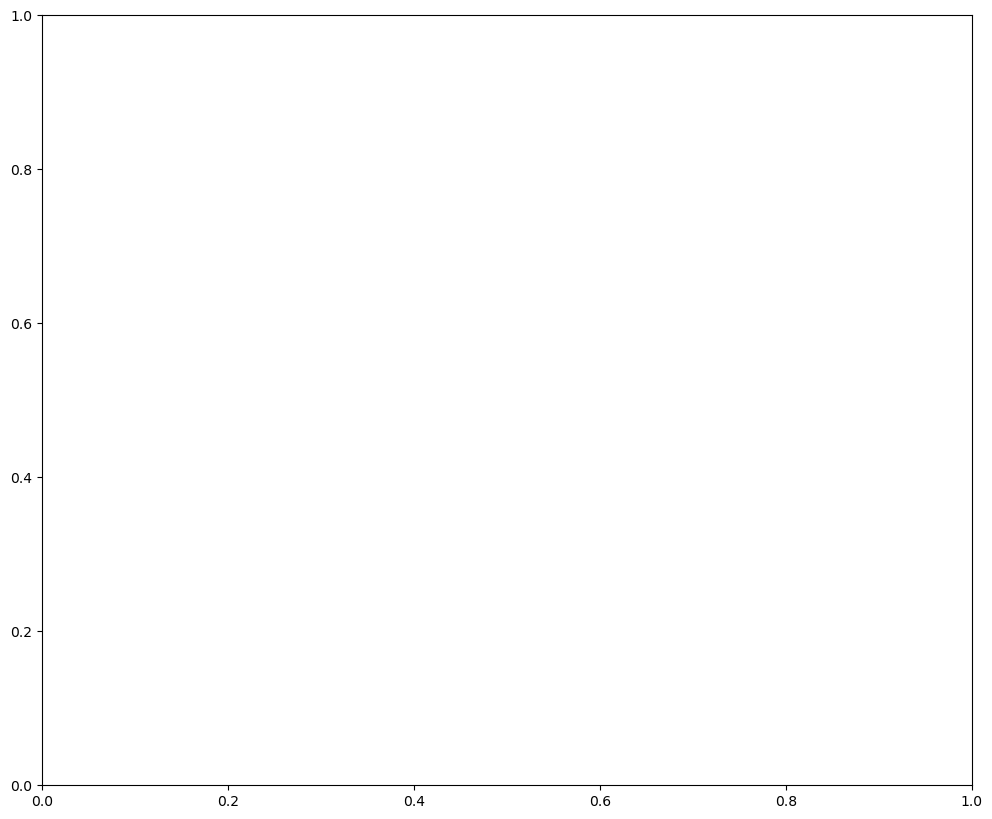

In [21]:
# Let's start by creating a frame for the figure with Matplotlib.
fig, ax = plt.subplots(figsize = (12,10))

As we can see, we have successfully created a figure frame that can be used to populate any desired data or map.
To plot the points on the map using Geopandas, we previously used the `gdf.plot()` function. In this case, we need to pass the `ax` parameter as the same __ax__ we created earlier, so that the map is populated within this frame.

<AxesSubplot:>

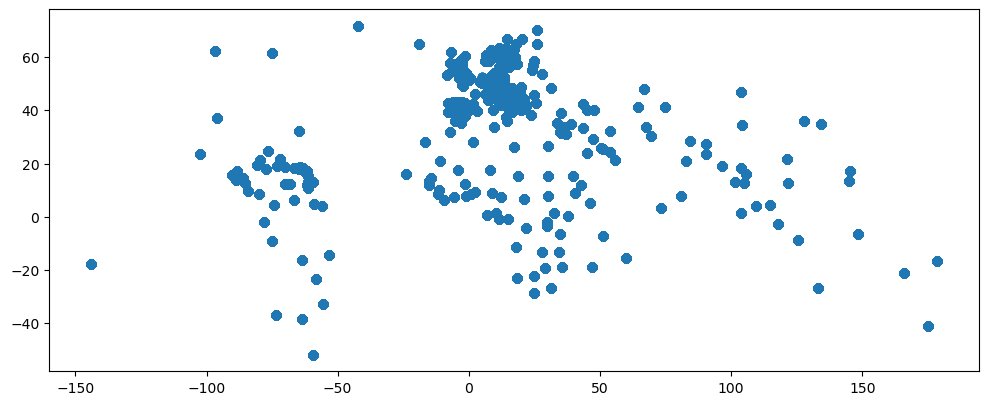

In [22]:
# Let's run the code again.
fig, ax = plt.subplots(figsize=(12,10))
gdf.plot(ax=ax)

Now we have the frame and the points displayed within it, as we saw earlier.

The dataset includes a date column for each day and the cumulative deceased numbers for each region.

In [23]:
gdf[['Date', 'CumulativeDeceased', 'Region']]

,Date,CumulativeDeceased,Region
0,2020-01-03,0.0,NaN
1,2020-01-03,0.0,NaN
2,2020-01-03,0.0,NaN
3,2020-01-03,0.0,NaN
4,2020-01-03,0.0,NaN
...,...,...,...
311124,2023-05-03,68.0,Uri
311125,2023-05-03,820.0,Valais
311126,2023-05-03,1018.0,Vaud
311127,2023-05-03,172.0,Zug


To filter the date in the GeoDataFrame, we can use the `Date` column and specify a particular date or time. For example, we can filter it for the date `'2020-03-02'`.

<AxesSubplot:>

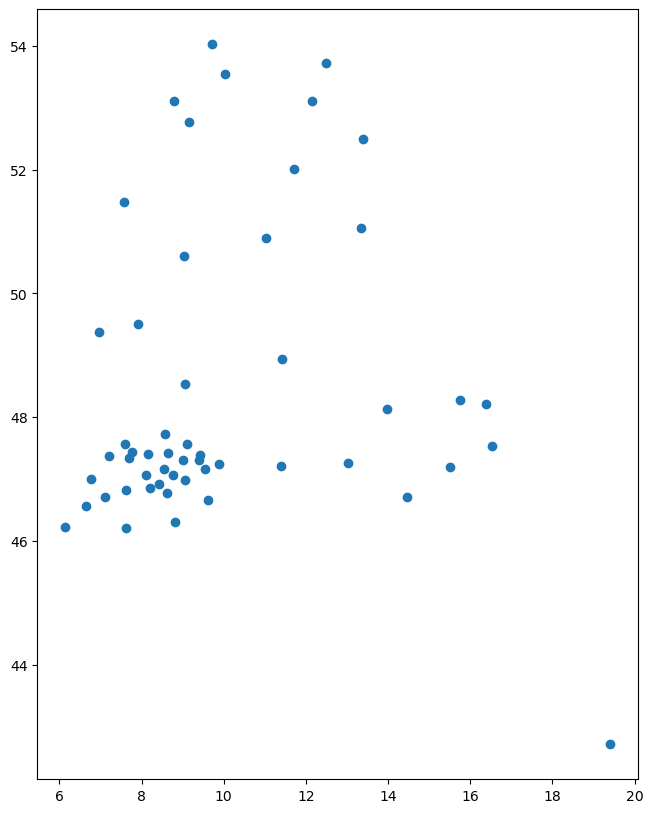

In [24]:
fig, ax = plt.subplots(figsize=(12,10))
gdf[gdf["Date"] == "2023-04-01"].plot(ax=ax)

Upon running this updated code, the points on the map will correspond only to those with data within this GeoDataFrame.

If we want to customize these points by setting their color to red and their edge color to white, we can make the necessary modifications.

<AxesSubplot:>

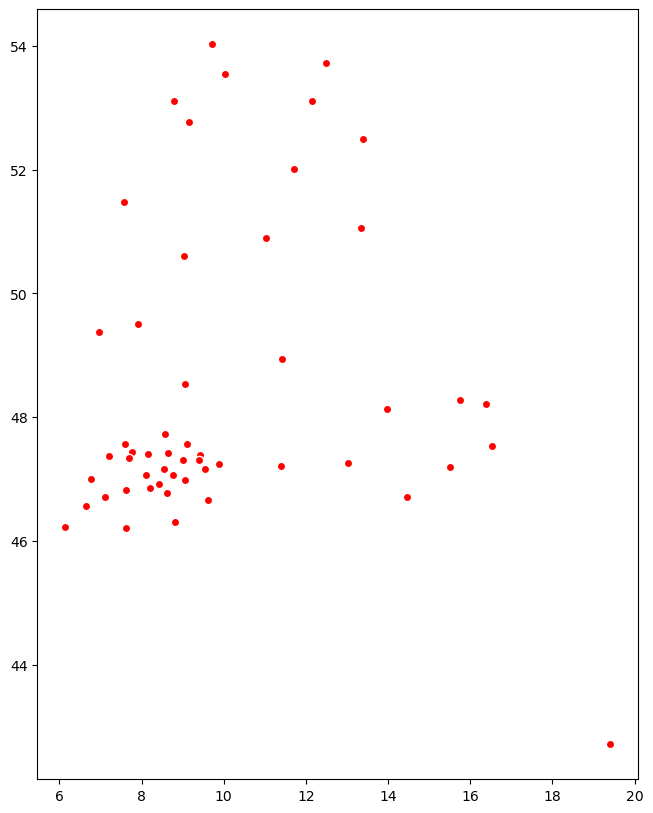

In [25]:
# Let's run the code again passing also the color and edgecolor.
fig, ax = plt.subplots(figsize=(12,10))
gdf[gdf["Date"] == "2023-04-01"].plot(ax=ax, color='Red', edgecolor='white')

As you can see, the points on the map are now represented by red dots.

So far, so good. Now, let's add a base map.
For this, we will use `contextily`, which integrates well with `pandas`.

- To add the base map, we will call `ctx.add_basemap()`. 
- Additionally, we need to specify the `ax` parameter as the same `ax` used previously. 
- Moreover, we need to define the `source`, which is the specific base map we desire.

To explore the available base maps, we can use `ctx.providers.keys()` to view a list of different options such as `OpenStreetMap`, `Mapbox`, `Stamen`, `Esri`, and others.

In [26]:
ctx.providers.keys()

dict_keys(['OpenStreetMap', 'MapTilesAPI', 'OpenSeaMap', 'OPNVKarte', 'OpenTopoMap', 'OpenRailwayMap', 'OpenFireMap', 'SafeCast', 'Stadia', 'Thunderforest', 'CyclOSM', 'Jawg', 'MapBox', 'MapTiler', 'Stamen', 'TomTom', 'Esri', 'OpenWeatherMap', 'HERE', 'HEREv3', 'FreeMapSK', 'MtbMap', 'CartoDB', 'HikeBike', 'BasemapAT', 'nlmaps', 'NASAGIBS', 'NLS', 'JusticeMap', 'GeoportailFrance', 'OneMapSG', 'USGS', 'WaymarkedTrails', 'OpenAIP', 'OpenSnowMap', 'AzureMaps', 'SwissFederalGeoportal', 'Gaode', 'Strava', 'OrdnanceSurvey'])

In this case, we will use `ctx.providers.Stamen.TonerLite` as our base map. Note that the "_Stamen_" and "_TonerLite_" parts should be capitalized, as observed from the available options.

To retrieve the key for the desired base map, we can search for it and call `Stamen.keys()`. This allows us to confirm that the chosen base map is "_TonerLite_".

In [27]:
ctx.providers.Stamen.keys()

dict_keys(['Toner', 'TonerBackground', 'TonerHybrid', 'TonerLines', 'TonerLabels', 'TonerLite', 'Watercolor', 'Terrain', 'TerrainBackground', 'TerrainLabels', 'TopOSMRelief', 'TopOSMFeatures'])

Let's run the code and see the result.

C:\Users\user\anaconda3\lib\site-packages\contextily\tile.py:581: UserWarning: The inferred zoom level of 23 is not valid for the current tile provider (valid zooms: 0 - 20).
  warnings.warn(msg)


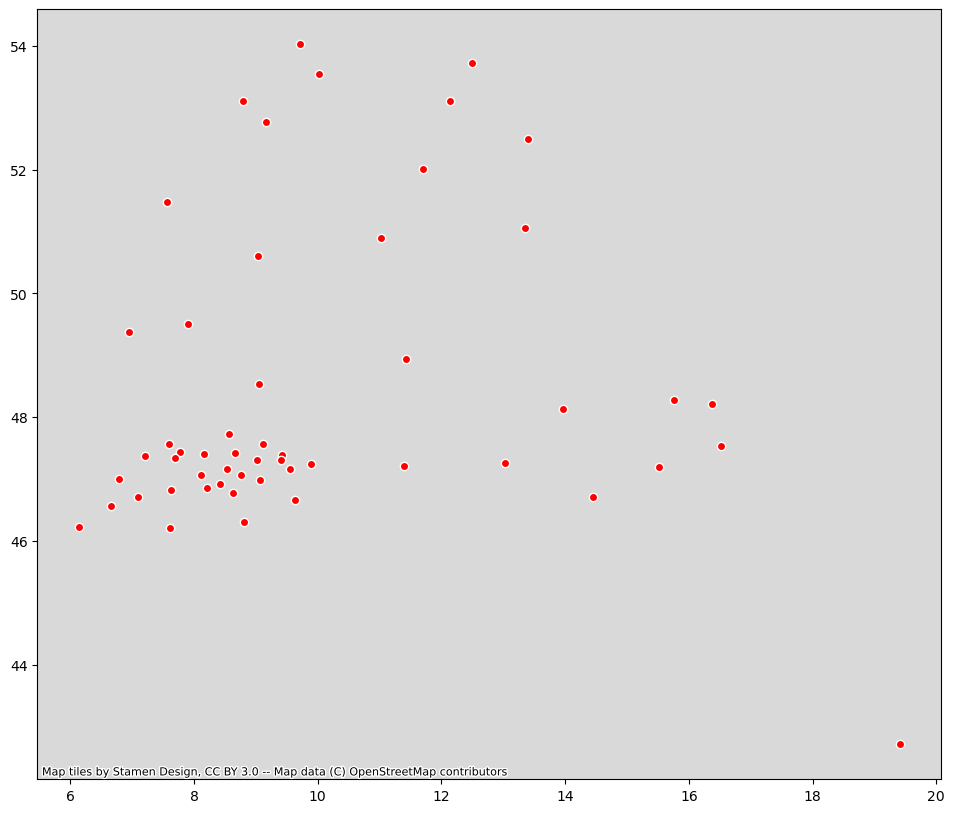

In [28]:
fig, ax = plt.subplots(figsize=(12,10))
gdf[gdf["Date"] == "2023-04-01"].plot(ax=ax, color="Red", edgecolor="white")
ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite)

At this point, the base map did not render correctly due to a projection mismatch.
To resolve this issue, we need to project the data into another projection. Luckily, __Geopandas__ makes it easy to convert data into different projections.

Before plotting, we can call `.to_crs()` on the GeoDataFrame and provide the __EPSG__ code of the desired projection. In this case, we will use the _Web Mercator_ projection, which has an EPSG code of __3857__. 

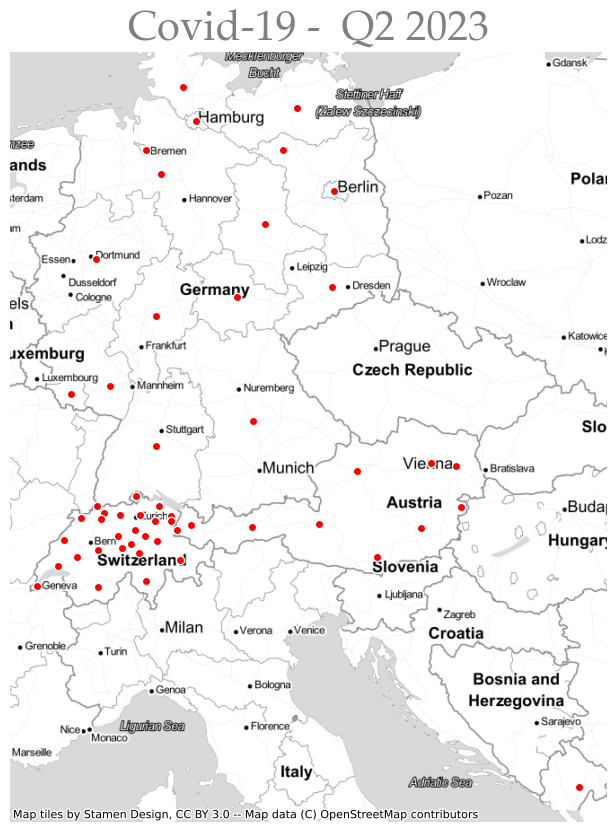

In [44]:
fig, ax = plt.subplots(figsize=(12,10))
gdf[gdf["Date"] == "2023-04-01"].to_crs(epsg=3857).plot(ax=ax, color="Red", edgecolor="white")
ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite)
plt.title(" Covid-19 -  Q2 2023 ", fontsize=30, fontname="Palatino Linotype", color="grey")
ax.axis("off")
plt.show()

Now, the map and the dots are displayed correctly on the base map.

At this stage, we can try using other base maps by accessing ctx.providers, selecting a provider, and then calling `.keys()` to see the available options. But for this project, we will use the `Stamen.TonerLite`. 

Let's modify our map with the following:
- add a title to the map using `plt.title()`,
- remove the axis labels for the __X__ and __Y__ axes by calling `plt.axis('off')`.

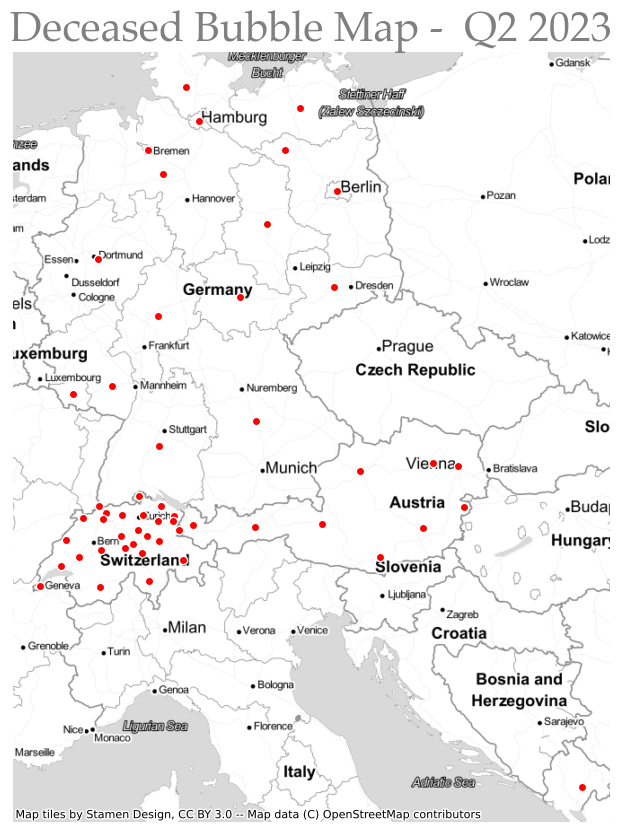

In [46]:
fig, ax = plt.subplots(figsize=(12,10))
gdf[gdf["Date"] == "2023-04-01"].to_crs(epsg=3857).plot(ax=ax, color='Red', edgecolor='white')
ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite)
plt.title("Deceased Bubble Map -  Q2 2023", fontsize=30, fontname="Palatino Linotype", color="grey")
ax.axis("off")
plt.show()

As we can see, the X and Y axis labels are now removed from the map.

We do, however, have one issue with numbers being displayed.
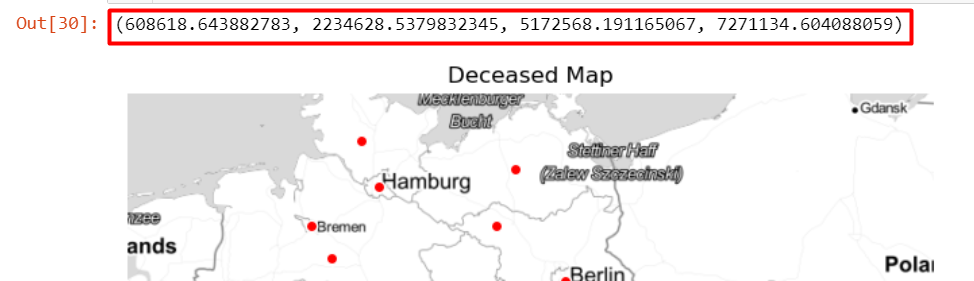

One way to address this is by adding a semicolon (`;`) at the end of the code. Alternatively, we can use `plt.show()` to achieve the same result.

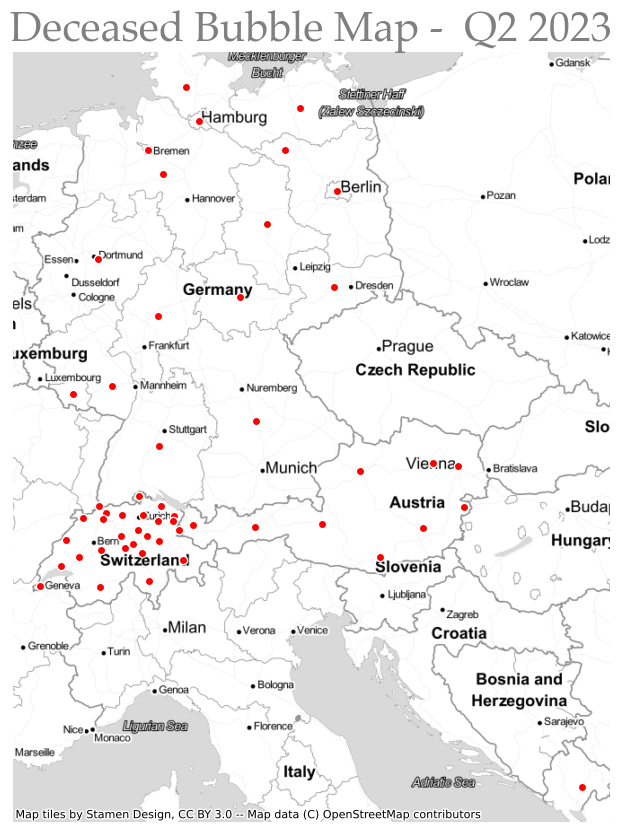

In [47]:
fig, ax = plt.subplots(figsize=(12,10))
gdf[gdf["Date"] == "2023-04-01"].to_crs(epsg=3857).plot(ax=ax, color='Red', edgecolor='white')
ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite)
plt.title("Deceased Bubble Map -  Q2 2023", fontsize=30, fontname="Palatino Linotype", color="grey")
plt.axis("off")
plt.show()

We have successfully created a beautiful map and added a base map to provide context.

Next, we will focus on creating bubble maps.

## Join & Merge

We explored how to create visually appealing maps using __Geopandas__ and __Contextly__. However, the point maps we created lacked informative value since they only represented individual points. We will address this issue by creating a bubble map.

A __bubble map__ uses the size of circles to encode numeric values within a geographic area. For this project, we can utilize a numeric column like the "__CumulativeDeceased__" to represent the size of the circles. Let's proceed with an example.

First, let's copy the code we used for the point map and paste it into a new cell. 

For this example, let's check the "__CumulativeDeceased__" on January 1, 2023.

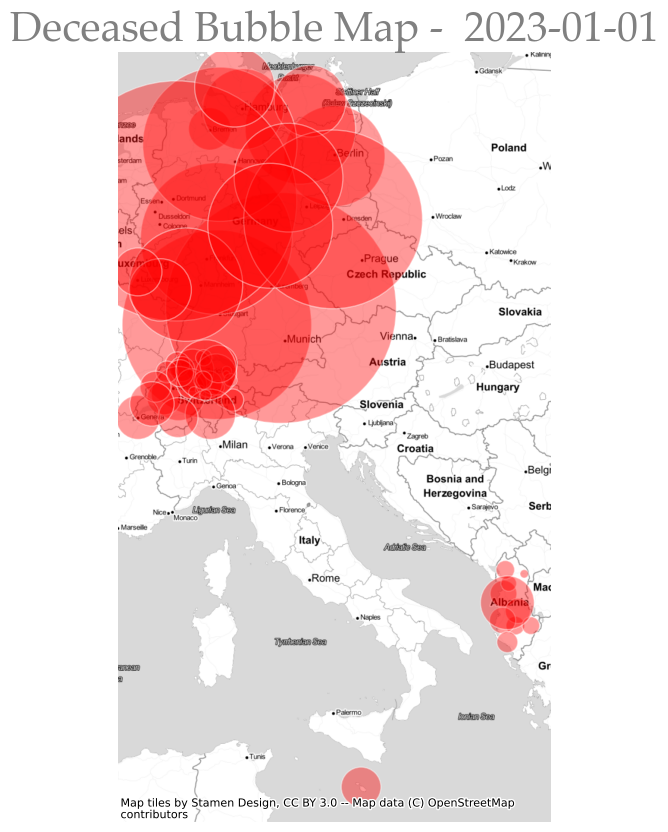

In [51]:
fig, ax = plt.subplots(figsize=(12,10))

# We'll make a few modifications, with the most important one being the marker size.
gdf[gdf["Date"] == "2023-01-01"].to_crs(epsg=3857).plot(markersize="CumulativeDeceased", alpha=0.4, ax=ax, color='Red', edgecolor='white')
# We need to set the marker size equal to the column we want to represent visually. 
# In this case, let's use the "cumulative_deceased" column as an example.
# To improve the visual representation, we can introduce some transparency 
# to the circles by setting the alpha parameter to 0.4 or any desired value.

ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite)
plt.title("Deceased Bubble Map -  2023-01-01", fontsize=30, fontname="Palatino Linotype", color="grey")
plt.axis("off")
plt.show()
# After setting the marker size, we'll run the code and observe the results.

However, we might notice that the points still appear to have varying sizes, which can be misleading. This occurs because the numbers haven't been standardized. To address this, we'll apply a scaling technique called `Min-Max` scaling to the "__death__" column.

`Min-Max` scaling involves a simple linear transformation. We subtract the minimum value from each data point and divide it by the range (maximum value minus the minimum value) of that column. To ensure the values range between 0 and 100, we'll multiply the result by 100.

In [33]:
gdf['normalized_death'] = ((gdf["CumulativeDeceased"] - gdf["CumulativeDeceased"].min()) / (gdf["CumulativeDeceased"].max() - gdf["CumulativeDeceased"].min()))*100

After running the code for Min-Max scaling, we'll see a new column called "__normalized_death__" in the dataframe. We'll utilize this column to create the bubble map.

In [34]:
gdf.head()

,Date,iso3,CountryName,Region,lat,lon,CumulativePositive,CumulativeDeceased,CumulativeRecovered,CurrentlyPositive,Hospitalized,IntensiveCare,EUcountry,EUCPMcountry,NUTS,geometry,normalized_death
0,2020-01-03,AIA,Anguilla,NaN,18.225120,-63.072130,0.0,0.0,NaN,0,NaN,NaN,False,False,AI,POINT (-63.07213 18.22512),0.0
1,2020-01-03,DMA,Dominica,NaN,15.416749,-61.364130,0.0,0.0,NaN,0,NaN,NaN,False,False,DM,POINT (-61.36413 15.41675),0.0
2,2020-01-03,DOM,Dominican Republic,NaN,18.736509,-70.161744,0.0,0.0,NaN,0,NaN,NaN,False,False,DO,POINT (-70.16174 18.73651),0.0
3,2020-01-03,FLK,Falkland Islands (Malvinas),NaN,-51.800581,-59.528839,0.0,0.0,NaN,0,NaN,NaN,False,False,FK,POINT (-59.52884 -51.80058),0.0
4,2020-01-03,IDN,Indonesia,NaN,-2.518722,118.015568,0.0,0.0,NaN,0,NaN,NaN,False,False,ID,POINT (118.01557 -2.51872),0.0


To create the bubble map, let's copy the code we used previously and replace "cumulative_deceased" with "normalized_death". This modification ensures that the points are sized proportionally based on the standardized values.

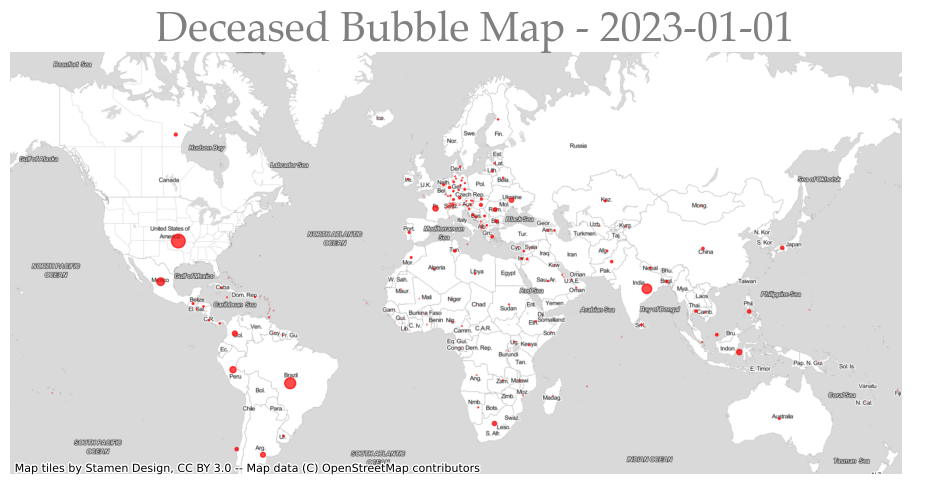

In [52]:
fig, ax = plt.subplots(figsize=(12,10))

# We'll make a few modifications, with the most important one being the marker size.
gdf[gdf["Date"] == "2023-01-10"].to_crs(epsg=3857).plot(markersize="normalized_death", alpha=0.7, ax=ax, color='Red')
# Let's change the date.
# To improve the visual representation, we can introduce some transparency 
# to the circles by setting the alpha parameter to 0.7 value.
# let's also remove the edgecolor to have the color appear more.

ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite)
plt.title("Deceased Bubble Map - 2023-01-01", fontsize=30, fontname="Palatino Linotype", color="grey")
plt.axis("off")
plt.show()

When we run this code, you'll notice that the points are significantly smaller, indicating a normalized bubble map.

Feel free to try different dates to see how the sizes of the circles change accordingly. By using the normalized values, all the points on the map will be displayed on the same scale, providing a fair representation of the data.

With this simple step, we have successfully created a normalized bubble map. Next task, we will proceed with data processing through Spatial Join.